In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [58]:
from PIL import Image
import matplotlib.pyplot as plt # plotting


images = np.load("../input/clock_image.npy")
lables =np.load("../input/clock_time.npy")


print(images.shape)
print(lables.shape)

(2000, 64, 64)
(2000, 2)


In [ ]:
#build cnn model
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D,MaxPool2D,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [ ]:
images= images.reshape((images.shape[0],64,64,1))
x_train, x_val, y_train, y_val = train_test_split(images, lables, test_size=0.2)
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

In [84]:
def my_model(x_train):
    model=Sequential()
    model.add(Conv2D(32,3, padding = "valid" ,input_shape=x_train.shape[1:] ,activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2), strides=2))
    model.add(Conv2D(64,3,padding = "valid",activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2), strides=2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(2))
    model.compile(loss='mse',
              optimizer='adam',
              metrics=['mse'])
    return model

model=my_model(x_train)
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 62, 62, 32)        320       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 12544)             0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               1605760   
_________________________________________________________________
dense_20 (Dense)             (None, 2)                 258       
Total para

In [85]:
def train(model, x, y, xval, yval):
    print(x.shape, y.shape)
    print(xval.shape, yval.shape)
    model.fit(x, y, batch_size=16, epochs=60, validation_data=(xval,yval))
    
train(model, x_train, y_train, x_val, y_val)

(1600, 64, 64, 1) (1600, 2)
(400, 64, 64, 1) (400, 2)
Train on 1600 samples, validate on 400 samples
Epoch 1/60
1600/1600 [==============================] - 8s 5ms/sample - loss: 107.8814 - mean_squared_error: 107.8814 - val_loss: 28.7850 - val_mean_squared_error: 28.7850
Epoch 2/60
1600/1600 [==============================] - 8s 5ms/sample - loss: 13.1141 - mean_squared_error: 13.1141 - val_loss: 7.8078 - val_mean_squared_error: 7.8078
Epoch 3/60
1600/1600 [==============================] - 8s 5ms/sample - loss: 4.2871 - mean_squared_error: 4.2871 - val_loss: 4.2788 - val_mean_squared_error: 4.2788
Epoch 4/60
1600/1600 [==============================] - 8s 5ms/sample - loss: 2.5362 - mean_squared_error: 2.5362 - val_loss: 2.3565 - val_mean_squared_error: 2.3565
Epoch 5/60
1600/1600 [==============================] - 8s 5ms/sample - loss: 1.7576 - mean_squared_error: 1.7576 - val_loss: 2.1955 - val_mean_squared_error: 2.1955
Epoch 6/60
1600/1600 [==============================] - 8s 5m

1600/1600 [==============================] - 8s 5ms/sample - loss: 0.4768 - mean_squared_error: 0.4768 - val_loss: 0.3100 - val_mean_squared_error: 0.3100
Epoch 50/60
1600/1600 [==============================] - 8s 5ms/sample - loss: 0.0675 - mean_squared_error: 0.0675 - val_loss: 0.2779 - val_mean_squared_error: 0.2779
Epoch 51/60
1600/1600 [==============================] - 8s 5ms/sample - loss: 0.0636 - mean_squared_error: 0.0636 - val_loss: 0.2997 - val_mean_squared_error: 0.2997
Epoch 52/60
1600/1600 [==============================] - 8s 5ms/sample - loss: 0.0866 - mean_squared_error: 0.0866 - val_loss: 0.2932 - val_mean_squared_error: 0.2932
Epoch 53/60
1600/1600 [==============================] - 8s 5ms/sample - loss: 0.0368 - mean_squared_error: 0.0368 - val_loss: 0.2629 - val_mean_squared_error: 0.2629
Epoch 54/60
1600/1600 [==============================] - 7s 5ms/sample - loss: 0.0268 - mean_squared_error: 0.0268 - val_loss: 0.2559 - val_mean_squared_error: 0.2559
Epoch 55/6

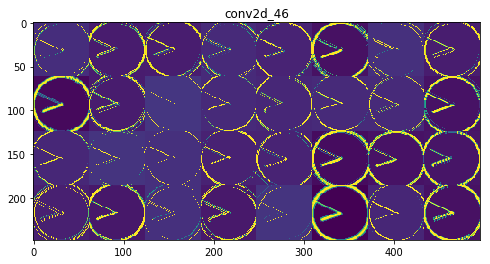

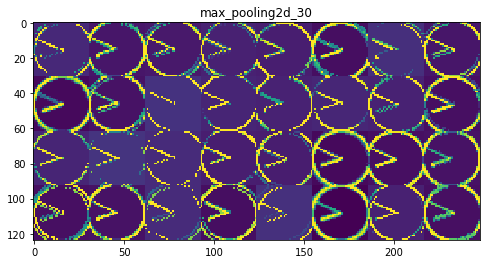

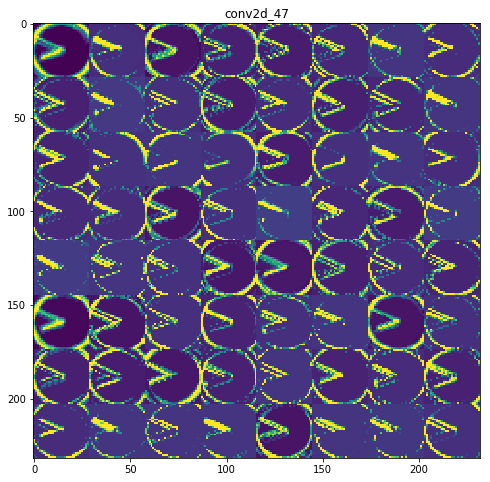

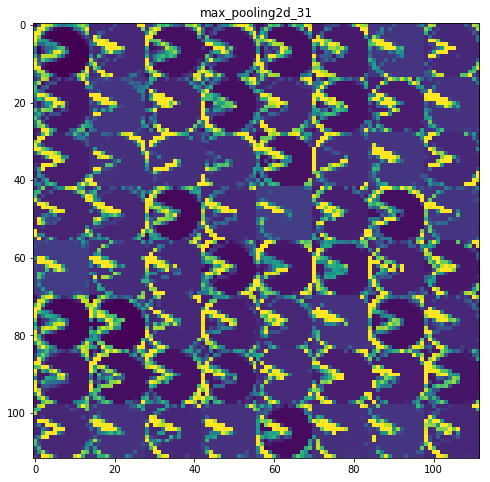

In [86]:
#build activation model
from tensorflow.keras.models import  Model
layer_outputs = [layer.output for layer in model.layers] # Extracts the outputs of the top 12 layers
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(x_val[4:5])

layer_names = []
for layer in model.layers[:4]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 8
for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [87]:
# How many cases are perfectly correct
def get_accuracy(x, ylabel):
    r = np.round(model.predict(x))
    diff = r - ylabel
    a = np.min(np.abs(diff), axis=1)
    return np.count_nonzero(a==0)/a.shape[0]

print("train accuracy: ", get_accuracy(x_train, y_train))
print("validation accuracy: ", get_accuracy(x_val, y_val))

train accuracy:  0.975625
validation accuracy:  0.9725
